#### Importing necessary libraries 

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Setting display options for pandas

In [110]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

#### Loading the dataset

In [111]:
loan_data = pd.read_csv('loan.csv', low_memory=False)

#### Displaying the first few rows of the dataset

In [112]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Checking the dimensions of the dataset

In [113]:
print("Shape of the dataset:", loan_data.shape)

Shape of the dataset: (39717, 111)


#### Listing the column names

In [114]:
print("Columns in the dataset:", loan_data.columns)

Columns in the dataset: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Data Cleaning

#### Identifying and filtering columns with missing values

In [115]:
# Identifying columns with missing values
null_percentage = round(100 * (loan_data.isnull().sum() / len(loan_data)), 2)

# Filtering columns with more than 0% missing values
columns_with_missing_values = null_percentage[null_percentage > 0].index

#### Dropping columns with more than 40% missing values

In [116]:
columns_to_drop = columns_with_missing_values[null_percentage[columns_with_missing_values] > 40]
loan_data.drop(columns_to_drop, axis=1, inplace=True)

#### Displaying the updated number of columns

In [117]:
print("Columns after removing missing values:", loan_data.shape[1])

Columns after removing missing values: 54


#### Identifying and dropping columns with only one unique value

In [118]:
# Identifying columns with only one unique value
unique_value_counts = loan_data.nunique().sort_values()
single_value_columns = unique_value_counts[unique_value_counts == 1].index

# Dropping columns with only one unique value
loan_data.drop(single_value_columns, axis=1, inplace=True)

#### Displaying the updated number of columns

In [119]:
print("Columns after removing single-value columns:", loan_data.shape[1])

Columns after removing single-value columns: 45


#### Dropping columns related to post-loan details

In [120]:
columns_to_drop = ['member_id', 'url', 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d',
                    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv']
loan_data.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the updated number of columns
print("Columns after dropping post-loan details:", loan_data.shape[1])

Columns after dropping post-loan details: 34


#### Filtering rows with loan status other than 'Fully Paid' or 'Charged Off'

In [121]:
# Filtering rows with loan status other than 'Fully Paid' or 'Charged Off'
loan_data = loan_data[loan_data.loan_status.isin(['Fully Paid', 'Charged Off'])]

#### Removing leading and trailing spaces in the 'term' column

In [122]:
loan_data['term'] = loan_data['term'].str.strip()

#### Displaying the unique values in the 'term' column

In [123]:
print("Unique values in 'term' column:", loan_data['term'].unique())

Unique values in 'term' column: ['36 months' '60 months']


#### Converting columns with percentage and date

In [124]:
# Converting columns with percentage values to float
loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.strip('%').astype(float)

# Converting date columns to datetime format
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y') - pd.DateOffset(years=100)
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y') - pd.DateOffset(years=100)

#### Creating derived/new variables

In [125]:
# Creating derived variables
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year.astype(object)
loan_data['issue_d_month'] = loan_data['issue_d'].dt.strftime('%b')
loan_data['issue_d_weekday'] = loan_data['issue_d'].dt.weekday.astype(object)
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line'].dt.year.astype(object)
loan_data['earliest_cr_line_month'] = loan_data['earliest_cr_line'].dt.strftime('%b')

# Creating a new variable for approved loan amount ratio
loan_data['approved_loan_amnt_ratio'] = round(loan_data['funded_amnt_inv'] * 100 / loan_data['loan_amnt'], 2)

### Univariate Analysis

#### Visualizing the distribution of loan amount using boxplot

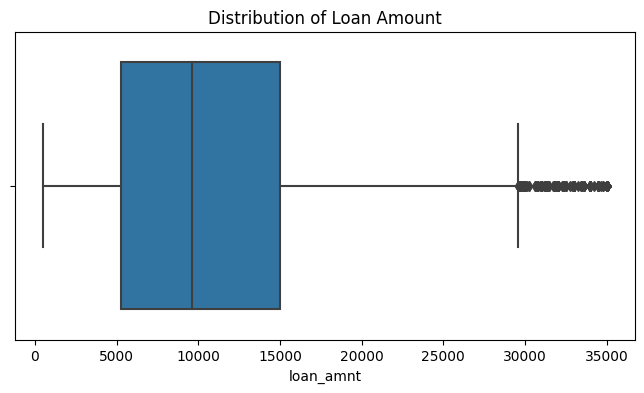

In [126]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=loan_data, x='loan_amnt')
plt.title('Distribution of Loan Amount')
plt.show()

#### Displaying statistics of loan amount

In [127]:
print("Statistics of Loan Amount:")
print(loan_data['loan_amnt'].describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Statistics of Loan Amount:
count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
10%       3090.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


##### The visualizations reveal that a substantial number of individuals opted for a loan amount of 10,000, and the median of the distribution is also 10,000. Conversely, there are relatively few instances where individuals borrowed more than 30,000.

#### Visualizing the distribution of funded amount using boxplot

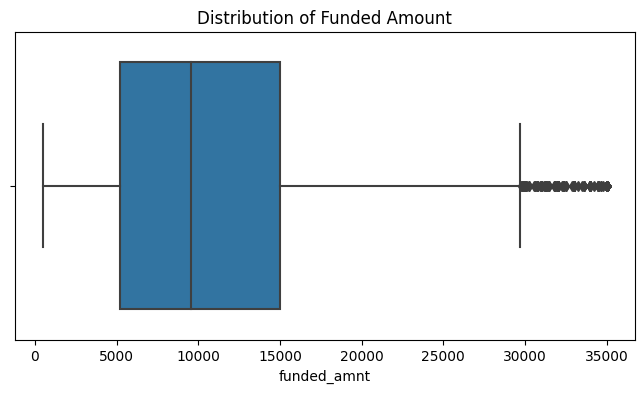

In [128]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=loan_data, x='funded_amnt')
plt.title('Distribution of Funded Amount')
plt.show()

#### Displaying statistics of funded amount

In [129]:
print("Statistics of Funded Amount:")
print(loan_data['funded_amnt'].describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

Statistics of Funded Amount:
count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
5%        2400.000000
10%       3000.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


##### The funded amount data closely mirrors the loan amount data, indicating that Lending Club generally approves a significant portion of the applied loan amounts.

#### Visualizing the distribution of approved loan amount ratio

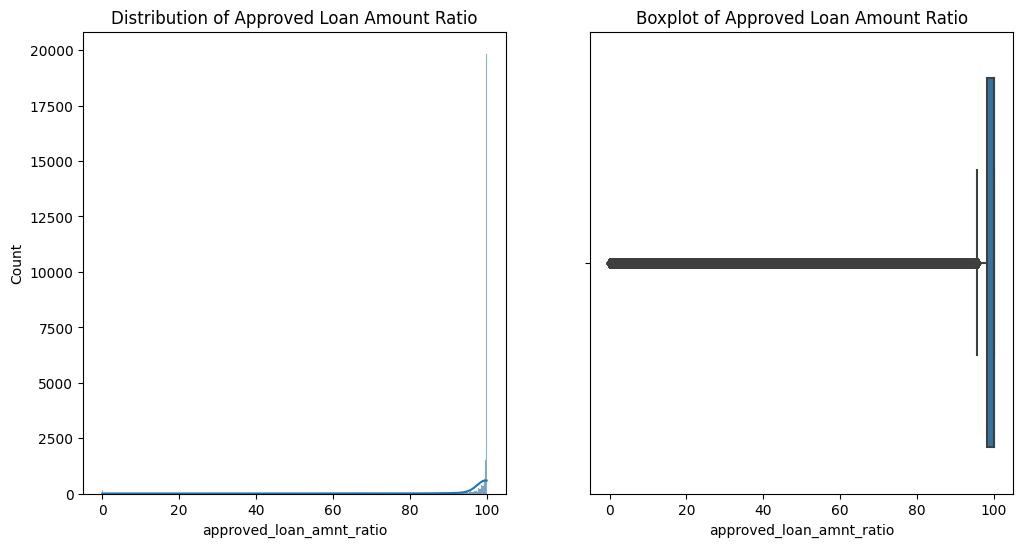

In [130]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(loan_data['approved_loan_amnt_ratio'], kde=True) 
plt.title('Distribution of Approved Loan Amount Ratio')
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_data, x='approved_loan_amnt_ratio')
plt.title('Boxplot of Approved Loan Amount Ratio')
plt.show()

###### 70% of borrowers received the full loan amount requested, which was funded entirely by investors.

#### Visualizing the distribution of interest rate using boxplot

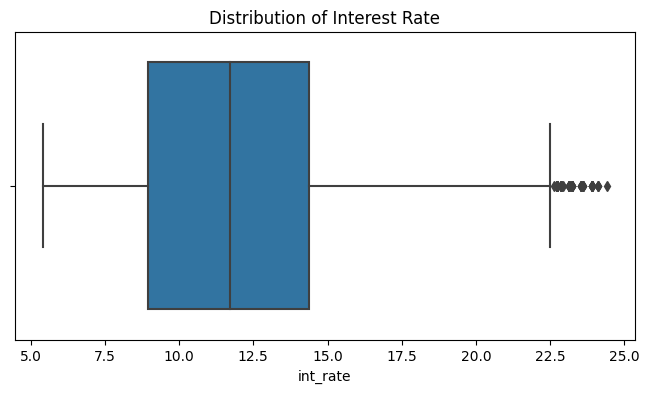

In [131]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=loan_data, x='int_rate')
plt.title('Distribution of Interest Rate')
plt.show()

##### Based on the boxplot of interest rates, it can be inferred that the majority of interest rates fall within the range of 9% to 14.5%. However, there are instances where individuals opted for loans with higher interest rates, reaching up to 22.5%.

#### Visualizing the distribution of loan status

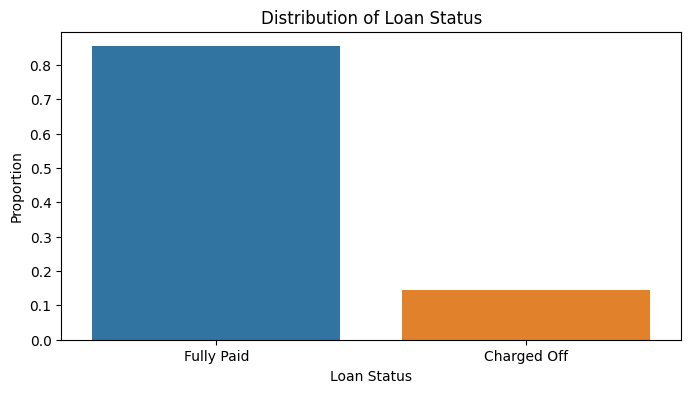

In [132]:
plt.figure(figsize=(8, 4))
sns.barplot(x=loan_data['loan_status'].value_counts(normalize=True).index,
            y=loan_data['loan_status'].value_counts(normalize=True).values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.show()

##### A total of 85% of borrowers have successfully repaid their loans in full, while 14% have defaulted on their loans.

### Segmented Univariate Analysis

#### Visualizing the relationship between loan amount and term

Text(0.5, 1.0, 'Term vs Loan Amount')

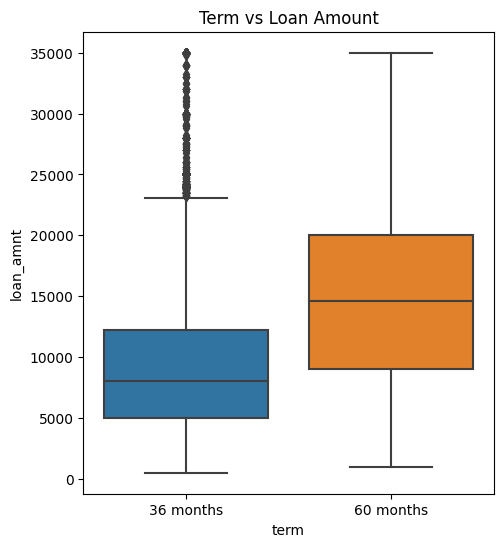

In [133]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=loan_data['term'], y=loan_data['loan_amnt'])
plt.title('Term vs Loan Amount')

#### Visualizing the relationship between loan amount and grade

Text(0.5, 1.0, 'Grade vs Loan Amount')

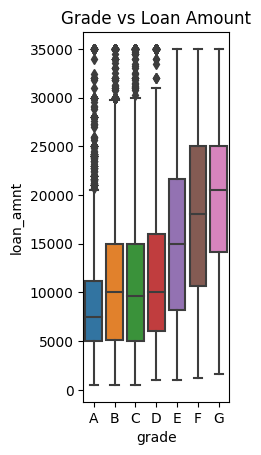

In [134]:
plt.subplot(1, 3, 2)
sns.boxplot(x=loan_data['grade'], y=loan_data['loan_amnt'], order=sorted(loan_data['grade'].unique()))
plt.title('Grade vs Loan Amount')

#### Visualizing the relationship between loan amount and loan status

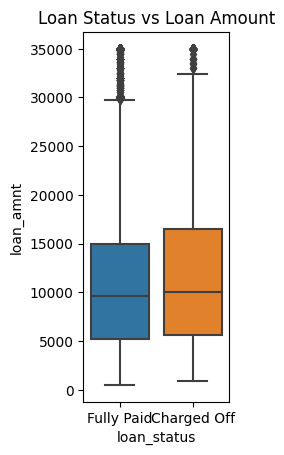

In [135]:
plt.subplot(1, 3, 3)
sns.boxplot(x=loan_data['loan_status'], y=loan_data['loan_amnt'])
plt.title('Loan Status vs Loan Amount')
plt.show()

#### Visualizing the relationship between interest rate and term

Text(0.5, 1.0, 'Term vs Interest Rate')

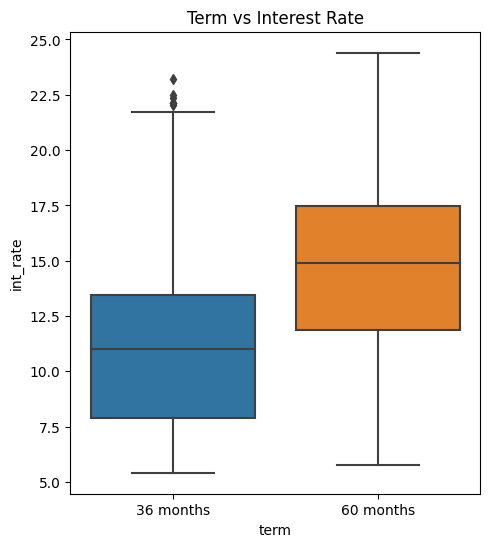

In [136]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=loan_data['term'], y=loan_data['int_rate'])
plt.title('Term vs Interest Rate')

#### Visualizing the relationship between interest rate and grade

Text(0.5, 1.0, 'Grade vs Interest Rate')

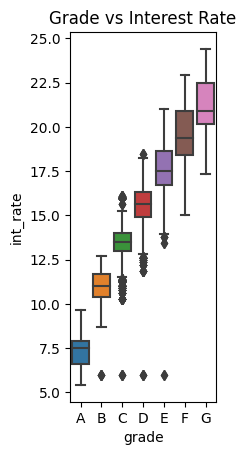

In [137]:
plt.subplot(1, 3, 2)
sns.boxplot(x=loan_data['grade'], y=loan_data['int_rate'], order=sorted(loan_data['grade'].unique()))
plt.title('Grade vs Interest Rate')

##### Higher tenure loans tend to have elevated interest rates.
##### Additionally, interest rates demonstrate an upward trend as grades decline from 'A' to 'G.'

#### Visualizing the relationship between interest rate and loan status

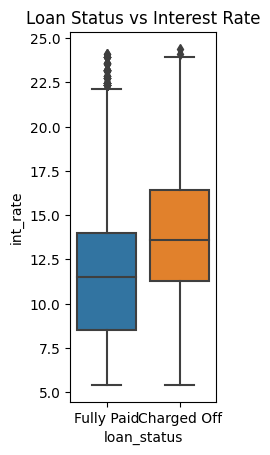

In [138]:
plt.subplot(1, 3, 3)
sns.boxplot(x=loan_data['loan_status'], y=loan_data['int_rate'])
plt.title('Loan Status vs Interest Rate')
plt.show()

##### The likelihood of loan default increases with higher interest rates.

### Bivariate Analysis

#### Visualizing the relationship between term and loan status

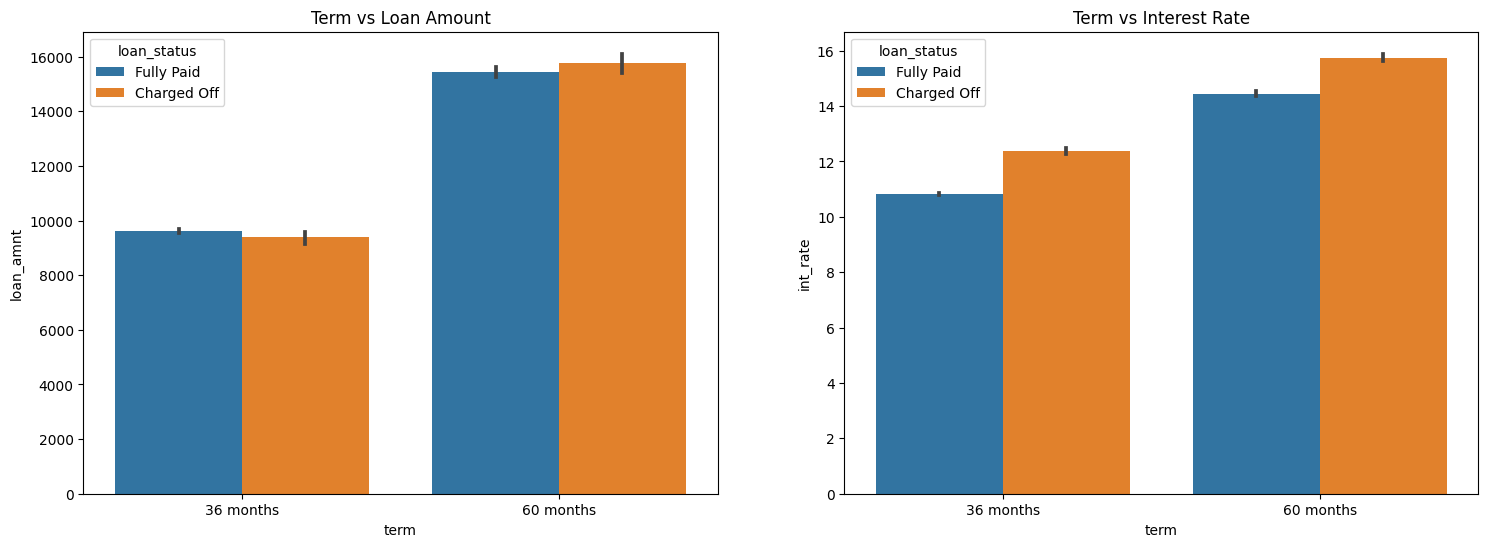

In [139]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('Term vs Loan Amount')

plt.subplot(1, 2, 2)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Term vs Interest Rate')
plt.show()

##### The proportion of borrowers defaulting on loans is higher in the 60-month term compared to the 36-month term.
##### The rate of fully paid loans is greater in the 36-month tenure.
##### Loan amount does not serve as a decisive factor for defaults in both 36 and 60 months.
##### Borrowers exhibit an equal distribution of default and non-default cases for both 36 and 60-month tenures.
##### Higher interest rates contribute to an increased default rate in both 36 and 60-month tenures.

#### Visualizing the relationship between grade and loan status

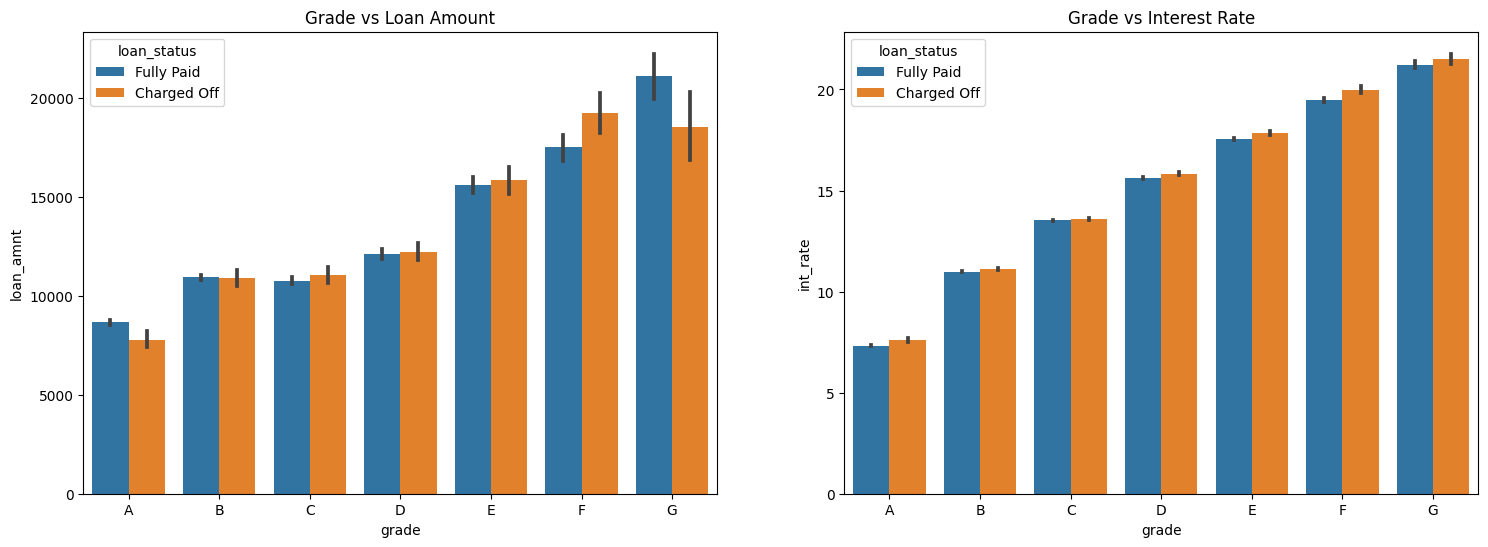

In [140]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, order=sorted(loan_data['grade'].unique()))
plt.title('Grade vs Loan Amount')

plt.subplot(1, 2, 2)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order=sorted(loan_data['grade'].unique()))
plt.title('Grade vs Interest Rate')
plt.show()

##### The incidence of charged-off loans tends to rise as the grades decrease.
##### Notably, there is a more pronounced disparity between charged-off and fully paid loans in the lower-grade categories 'F' and 'G.'
##### Individuals with lower grades ('F' and 'G') not only borrow higher amounts but also exhibit a higher propensity to default on their loans.
##### As the grade decreases, there is a gradual increase in interest rates, contributing to a heightened likelihood of loan default.

### Correlation Matrix

#### Calculating and plotting the correlation matrix

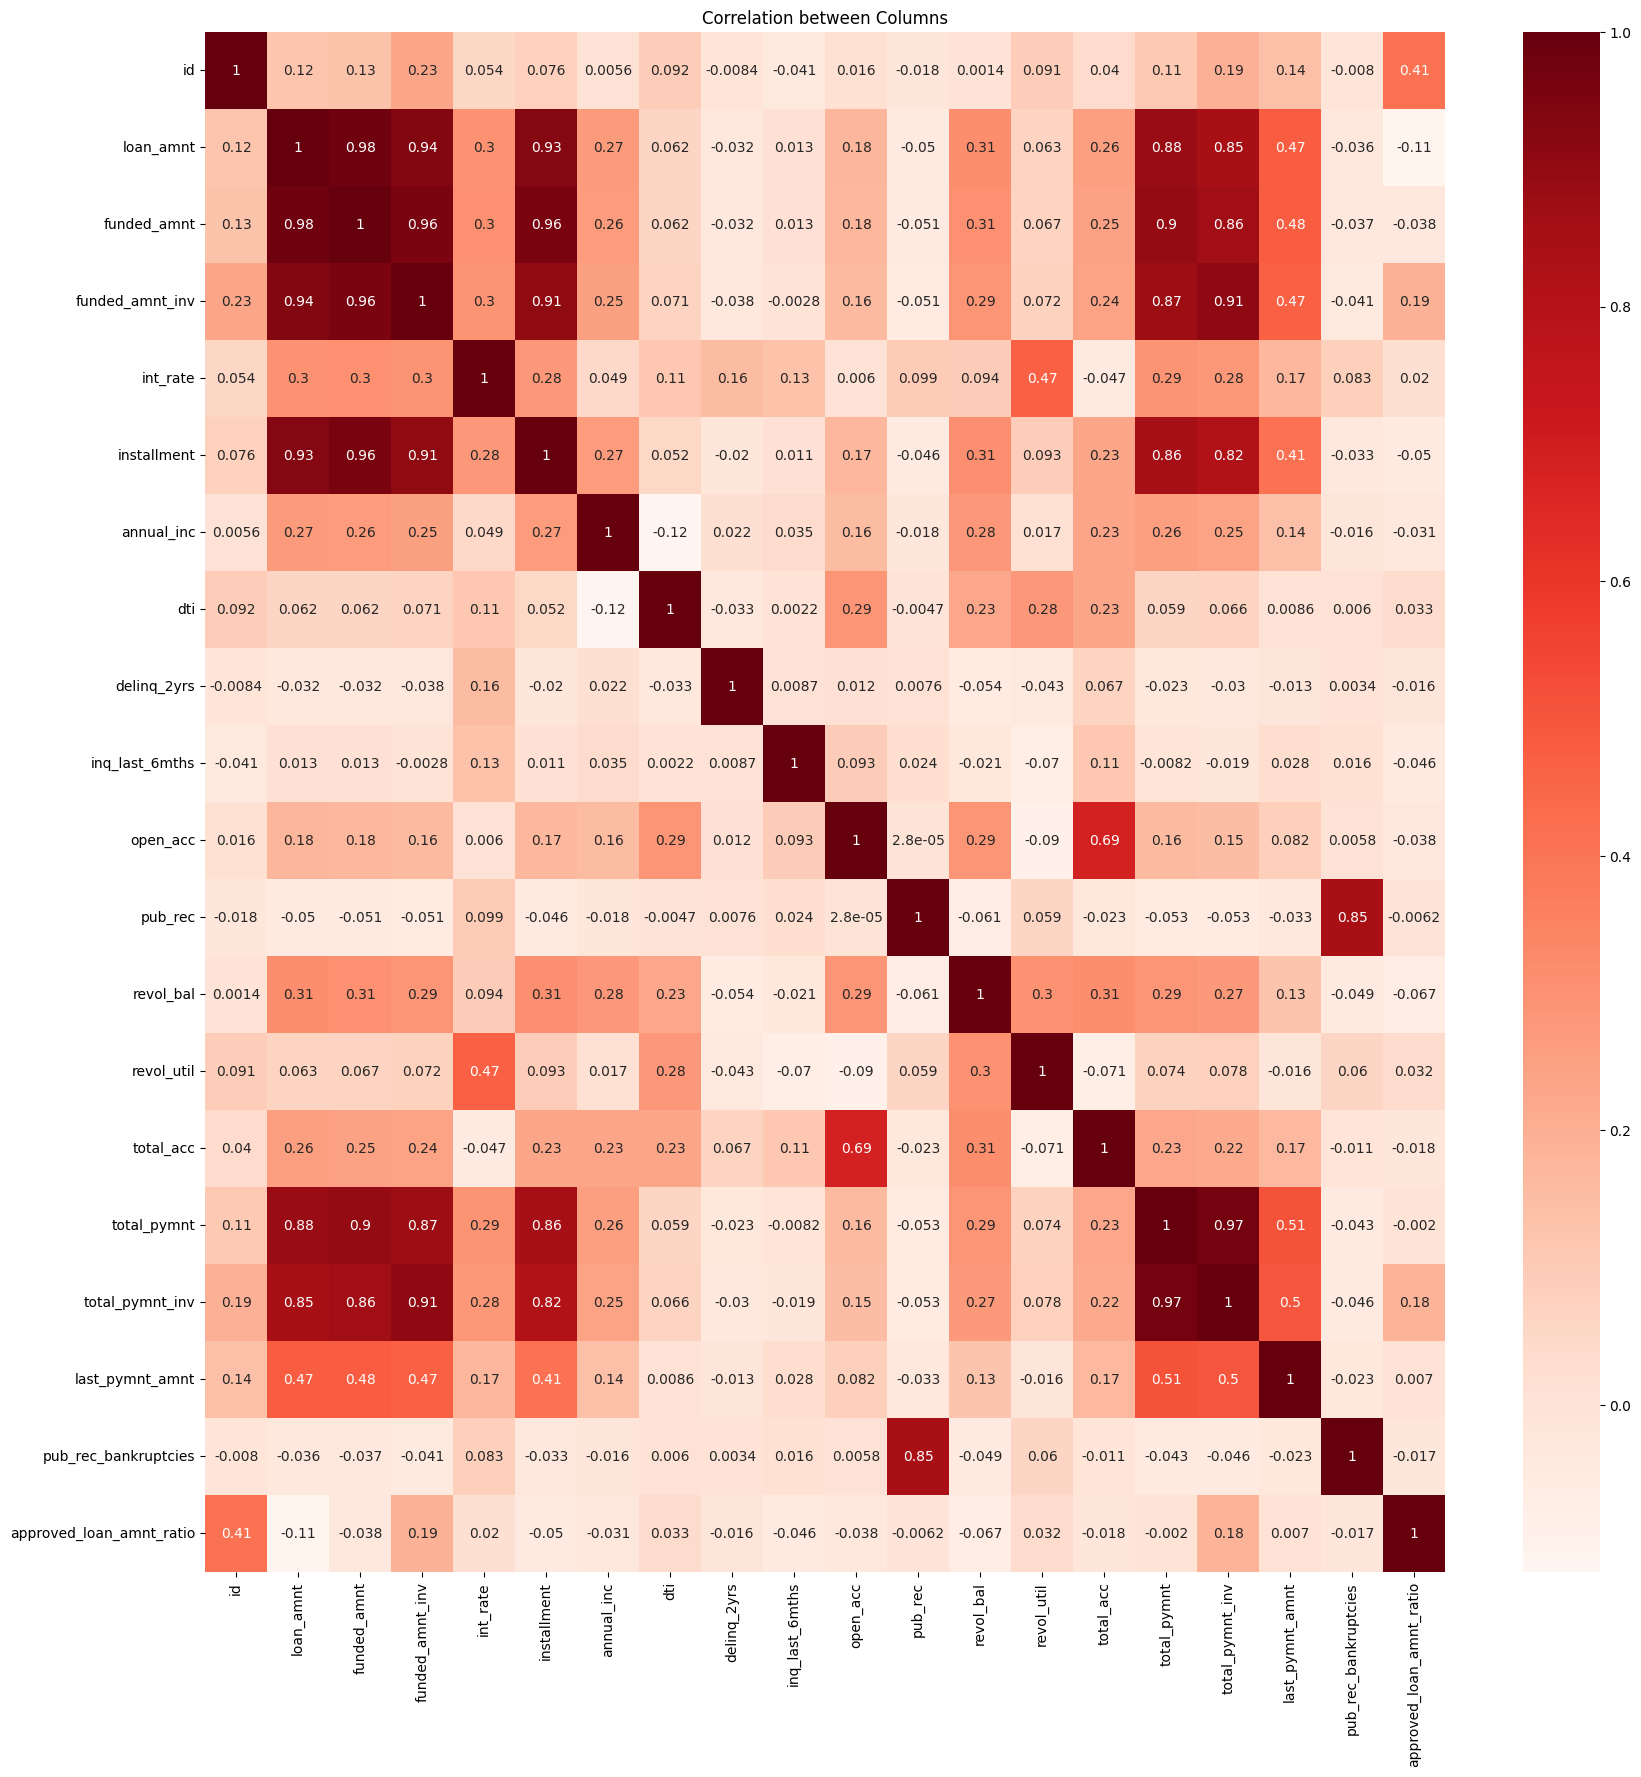

In [141]:
correlation_matrix = loan_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title("Correlation between Columns")
plt.show()

##### There is a strong positive correlation between the number of public derogatory records and public bankruptcies records
##### Individuals with high revolving utilization tend to have elevated interest rates